In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

# Check the description of dataset

In [5]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [7]:
print(df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


# Preparing the Dataset

In [8]:
dataset = pd.DataFrame(df.data,columns=df.feature_names)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
dataset['Price'] = df.target

In [10]:
dataset.CHAS.unique()

array([0., 1.])

In [11]:
df = dataset

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
df2 = pd.DataFrame()

In [16]:
for i in df.columns:
    if i != 'CHAS':
        df2 = pd.concat([df2,remove_outlier(df[[i]],i)],axis=1)
        df2 = df2.dropna()
        print(i,df2.shape)
    else:
        df2 = pd.concat([df2,df[i]],axis=1)

CRIM (440, 1)
ZN (372, 2)
INDUS (372, 3)
NOX (372, 5)
RM (353, 6)
AGE (353, 7)
DIS (353, 8)
RAD (353, 9)
TAX (353, 10)
PTRATIO (344, 11)
B (299, 12)
LSTAT (298, 13)
Price (288, 14)


In [17]:
df2.shape

(288, 14)

In [18]:
df = df2

In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,1.054928,3.807292,10.728160,0.069444,0.536955,6.168326,67.044444,3.957144,7.156250,362.288194,18.753472,389.017396,12.182361,21.487847
std,1.992534,8.541772,6.250122,0.254651,0.100122,0.438341,26.377812,1.731061,6.835542,141.455464,1.740836,11.167053,5.465068,4.716199
min,0.006320,0.000000,1.380000,0.000000,0.409000,4.903000,2.900000,1.321600,1.000000,188.000000,14.700000,344.910000,2.940000,8.500000
25%,0.090170,0.000000,5.935000,0.000000,0.460000,5.888750,47.200000,2.515925,4.000000,277.000000,17.800000,386.825000,8.050000,18.700000
50%,0.178410,0.000000,8.560000,0.000000,0.520000,6.127000,71.650000,3.658800,5.000000,307.000000,19.000000,393.410000,11.360000,21.200000
75%,0.616915,0.000000,18.100000,0.000000,0.581000,6.422250,91.000000,5.218725,6.000000,403.000000,20.200000,396.900000,14.992500,23.800000
max,8.982960,30.000000,27.740000,1.000000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.200000


In [20]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.210298,0.506252,0.060150,0.640895,-0.060011,0.352699,-0.394660,0.893373,0.807501,0.246332,-0.128681,0.302871,-0.328228
ZN,-0.210298,1.000000,-0.320579,-0.057901,-0.398136,0.156293,-0.327002,0.598128,-0.116417,-0.241997,-0.211530,0.053988,-0.225070,0.170712
INDUS,0.506252,-0.320579,1.000000,0.037122,0.692308,-0.241072,0.478044,-0.627678,0.424286,0.609910,0.243727,-0.160408,0.476468,-0.428978
CHAS,0.060150,-0.057901,0.037122,1.000000,0.105217,0.010191,0.139801,-0.115617,0.077816,0.001474,-0.103510,-0.020496,0.140313,0.070044
NOX,0.640895,-0.398136,0.692308,0.105217,1.000000,-0.250558,0.612131,-0.708321,0.506332,0.622623,0.098516,-0.183748,0.503168,-0.427385
RM,-0.060011,0.156293,-0.241072,0.010191,-0.250558,1.000000,-0.149741,0.163710,0.036202,-0.064887,-0.012544,0.101781,-0.634079,0.660472
AGE,0.352699,-0.327002,0.478044,0.139801,0.612131,-0.149741,1.000000,-0.612363,0.235628,0.358985,0.160232,-0.079828,0.571387,-0.455836
DIS,-0.394660,0.598128,-0.627678,-0.115617,-0.708321,0.163710,-0.612363,1.000000,-0.269546,-0.440519,-0.178718,0.080782,-0.389063,0.261787
RAD,0.893373,-0.116417,0.424286,0.077816,0.506332,0.036202,0.235628,-0.269546,1.000000,0.860579,0.296001,-0.102619,0.163261,-0.187982
TAX,0.807501,-0.241997,0.609910,0.001474,0.622623,-0.064887,0.358985,-0.440519,0.860579,1.000000,0.330606,-0.111813,0.274855,-0.359987


In [21]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

df = df[['CRIM', 'ZN', 'CHAS', 'RM', 'PTRATIO', 'B', 'Price']]

In [22]:
x = df.iloc[:,:-1]
y = df.Price

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [28]:
ypred = reg.predict(xtest)

In [29]:
reg.score(xtest,ytest)

0.7569518923039343

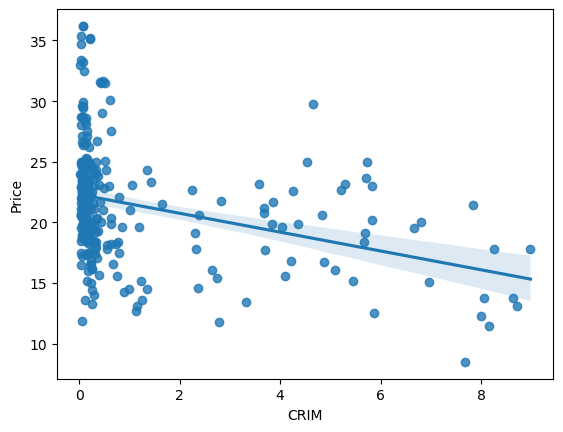

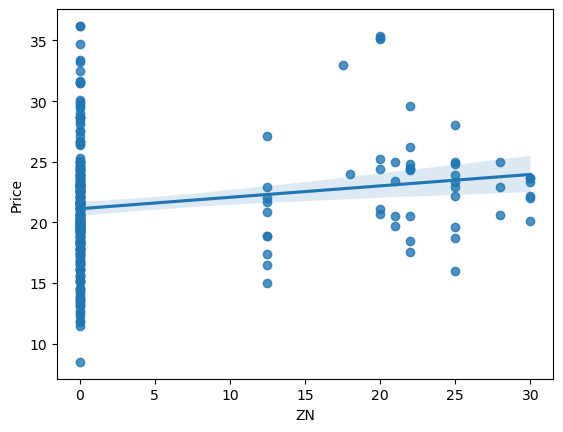

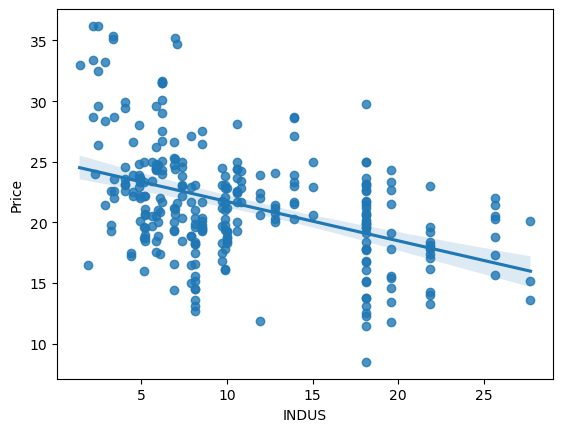

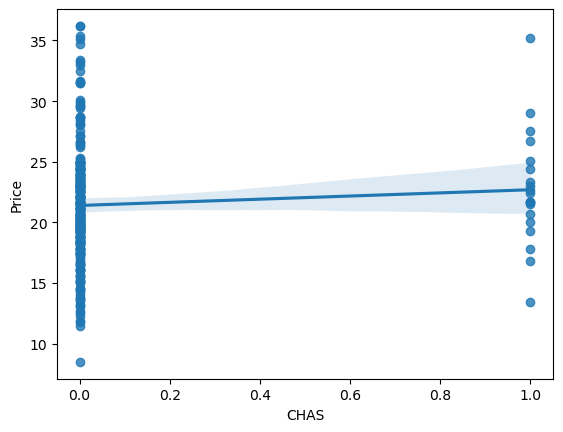

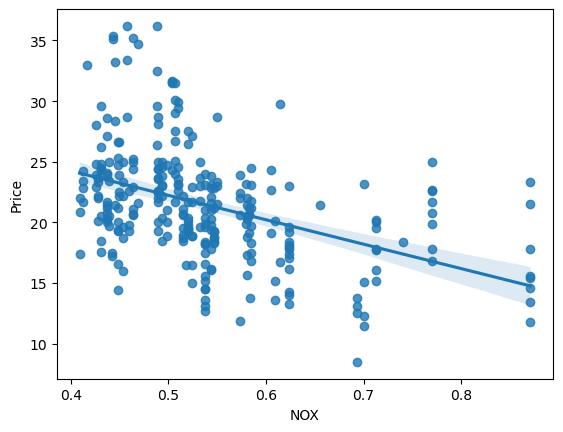

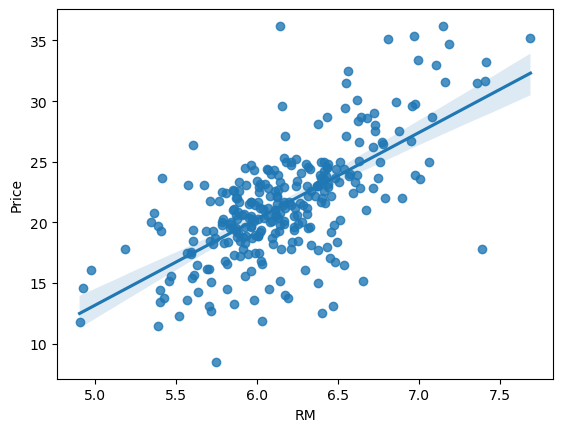

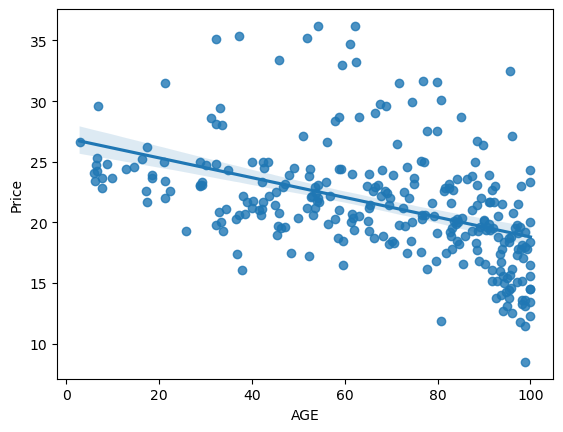

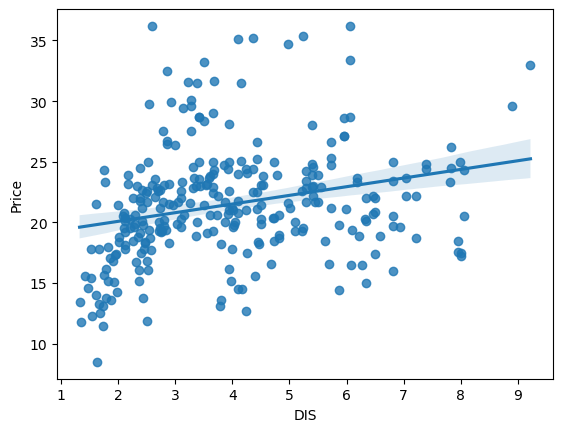

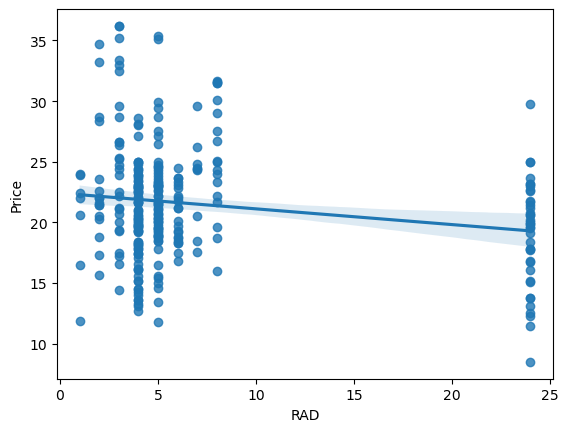

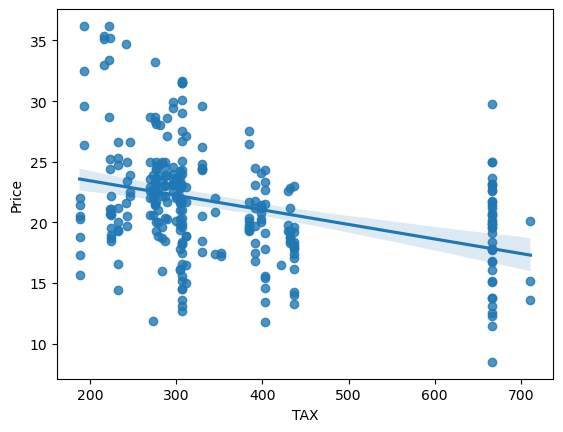

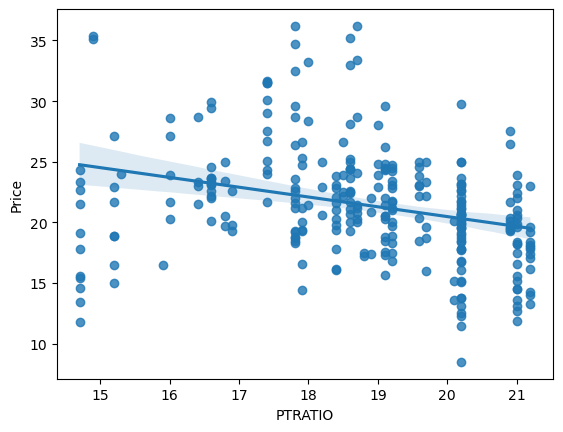

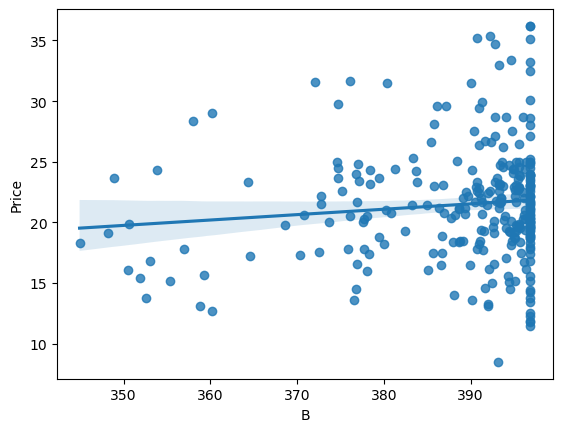

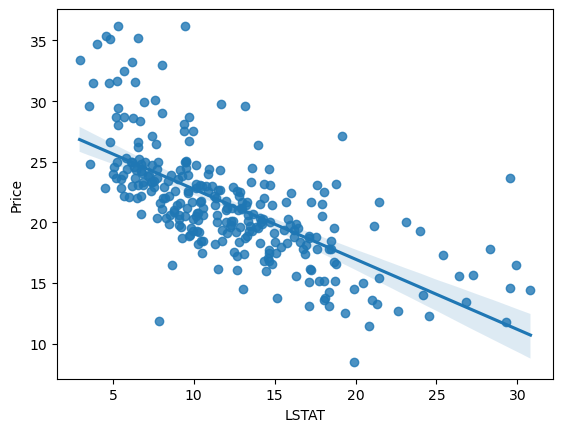

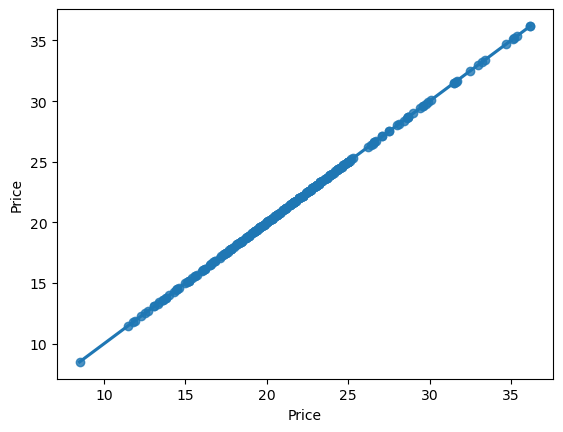

In [30]:
for i in df.columns:
    sns.regplot(x=df[i],y=df.Price)
    plt.show()

In [31]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.210298,0.506252,0.060150,0.640895,-0.060011,0.352699,-0.394660,0.893373,0.807501,0.246332,-0.128681,0.302871,-0.328228
ZN,-0.210298,1.000000,-0.320579,-0.057901,-0.398136,0.156293,-0.327002,0.598128,-0.116417,-0.241997,-0.211530,0.053988,-0.225070,0.170712
INDUS,0.506252,-0.320579,1.000000,0.037122,0.692308,-0.241072,0.478044,-0.627678,0.424286,0.609910,0.243727,-0.160408,0.476468,-0.428978
CHAS,0.060150,-0.057901,0.037122,1.000000,0.105217,0.010191,0.139801,-0.115617,0.077816,0.001474,-0.103510,-0.020496,0.140313,0.070044
NOX,0.640895,-0.398136,0.692308,0.105217,1.000000,-0.250558,0.612131,-0.708321,0.506332,0.622623,0.098516,-0.183748,0.503168,-0.427385
RM,-0.060011,0.156293,-0.241072,0.010191,-0.250558,1.000000,-0.149741,0.163710,0.036202,-0.064887,-0.012544,0.101781,-0.634079,0.660472
AGE,0.352699,-0.327002,0.478044,0.139801,0.612131,-0.149741,1.000000,-0.612363,0.235628,0.358985,0.160232,-0.079828,0.571387,-0.455836
DIS,-0.394660,0.598128,-0.627678,-0.115617,-0.708321,0.163710,-0.612363,1.000000,-0.269546,-0.440519,-0.178718,0.080782,-0.389063,0.261787
RAD,0.893373,-0.116417,0.424286,0.077816,0.506332,0.036202,0.235628,-0.269546,1.000000,0.860579,0.296001,-0.102619,0.163261,-0.187982
TAX,0.807501,-0.241997,0.609910,0.001474,0.622623,-0.064887,0.358985,-0.440519,0.860579,1.000000,0.330606,-0.111813,0.274855,-0.359987


In [32]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(ytest,ypred))
print(mean_squared_error(ytest,ypred))
print(np.sqrt(mean_squared_error(ytest,ypred)))

1.9235655622205907
7.094002045748944
2.6634567850349935


In [34]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [35]:
# for i in range(5000):
#     xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=i)
#     xtrain = scalar.fit_transform(xtrain)
#     xtest = scalar.transform(xtest)
#     reg = LinearRegression()
#     reg.fit(xtrain,ytrain)
#     ypred = reg.predict(xtest)
#     if reg.score(xtest,ytest) > 0.85:
#         print(i, reg.score(xtest,ytest))
#         print(mean_absolute_error(ytest,ypred))
#         print(mean_squared_error(ytest,ypred))
#         print(np.sqrt(mean_squared_error(ytest,ypred)))
#         print()

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=4924)
xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)
reg = LinearRegression()
reg.fit(xtrain,ytrain)
ypred = reg.predict(xtest)
print('R2 Score :', reg.score(xtest,ytest))
print('MAE :', mean_absolute_error(ytest,ypred))
print('MSE :',mean_squared_error(ytest,ypred))
print('RMSE :',np.sqrt(mean_squared_error(ytest,ypred)))

R2 Score : 0.8694018641628659
MAE : 1.5070015380194328
MSE : 4.1651363754567905
RMSE : 2.0408665746336263


In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=4924)
xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)
reg = LinearRegression()
reg.fit(xtrain,ytrain)
ypred = reg.predict(xtest)
print('R2 Score :', reg.score(xtest,ytest))
print('MAE :', mean_absolute_error(ytest,ypred))
print('MSE :',mean_squared_error(ytest,ypred))
print('RMSE :',np.sqrt(mean_squared_error(ytest,ypred)))

R2 Score : 0.8597412405073251
MAE : 1.4866962426097066
MSE : 3.9850717012672163
RMSE : 1.9962644367085278


In [38]:
reg.predict(scalar.transform(x.iloc[0,:].values.reshape(1,-1)))

array([25.07471826])

In [39]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

# Pickle

In [40]:
import pickle

In [41]:
pickle.dump(reg,open('Regression.pkl','wb'))

In [42]:
model = pickle.load(open('Regression.pkl','rb'))

In [43]:
model.predict(scalar.transform(x.iloc[0,:].values.reshape(1,-1)))

array([25.07471826])